#Assignment 2:

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
#import sys
#import urllib2

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


###KS test & Anderson Darling test 

In [2]:
#generate the distribution
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "KS: normal on normal", scipy.stats.kstest(dist_n,'norm')
print "Anderson: normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)

print "KS: binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "Anderson: binomial on normal", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[5.0]]
print threshold

##what is this threshold I am saving??

KS: normal on normal (0.02189034875684559, 0.72412236045567224)
Anderson: normal on normal (0.40352942356230415, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KS: binomial on normal (0.5, 0.0)
Anderson: binomial on normal (180.12553460024333, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 0.784]


* Threshold is standard of reject NULL hypothesis or not (be able to change significant level).
* The statistics value will be larger if the distributions are not likely to be related. think about this in terms of rejection of the NULL hypothesis.
* p value of KS(normal on normal) is 0.8055 which is larger than significant level 5%. From this, NULL hypothesis (the sample does not come from the model distribution) can be rejected. Therefore, the sample and model distributions are identical.
* Anderson(normal on normal) is 0.143629 which is lower than threshold at significant level 5%. It means distribution is likely to be related. In terms of rejection of the NULL hypothesis, the NULL hypothesis (the sample does not come from the model distribution) is rejected because statistical value is lower than threshold value.
* p value of KS(binomial on normal) is 0.0 which is lower than significant leverl 5%. From this, NULL hypothesis (the sample does not come from the model distribution) can not be rejected. Therefore, the sample and model distributions are not identical.
* Anderson(binomial on normal) is 179.51 which is much larger than threshold value at significant level 5%. It means distribution is not likely to be related. In terms of rejection of the NULL hypothesis, the NULL hypothesis (the sample does not come form the model distribution) is not rejected.

###KL divergence

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest

In [4]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

#you can interpret this as a distance: it increases as the distributions diverge

normal on normal 0.00372078034113
binomial on normal 1.66971222205


* The sample distribution is same with the model distribution, if reuslt value is 0.
* KL divergence of normal on normal is 0.0029 which is little larger than 0. It means this sample distribution has almost same distribution with normal distribution. 
* KL divergence of binormal on normal is 1.682 which is larger than 0. It means this binomial sample distribution is not same with the normal model distribution.

##BINOMIAL

In [18]:
#to store the data i am generating an empty array of the size of the values of n i want to test. 
#i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, 
#but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match
#p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    #if i%10 == 0: 
    #    print n
    #    pl.figure()
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p))) #QUESTION


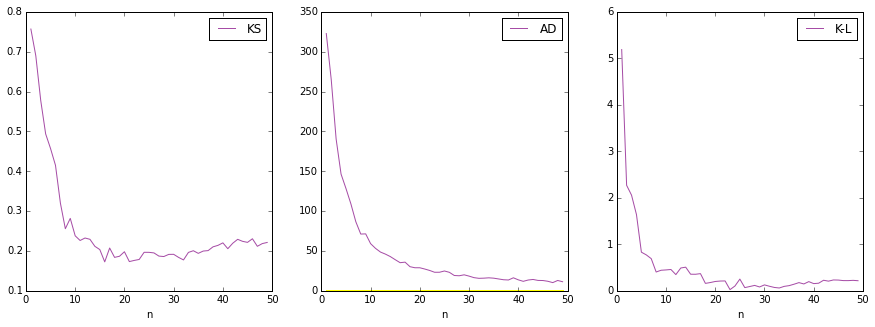

In [19]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS', color='Purple', alpha=0.7)
pl.xlabel('n')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD', color='Purple', alpha=0.7)
pl.plot([narray[0], narray[-1]],[threshold, threshold], color='Yellow')
pl.plot()
pl.plot()
pl.xlabel('n')
pl.legend()

fig.add_subplot(133)
pl.xlabel('n')
pl.plot(narray, kl_b, label='K-L', color='Purple', alpha=0.7)

pl.legend()

###Result
* As n*p value(mean value) increase, statistic result value of goodness of fit testing decrease. 
* It means, possibility to reject NULL hypothesis increase.
* On the other word, if n*p value increase, the binomial distribution would be likely to be related to normal distribution.

##Poisson

In [30]:
#to store the data i am generating an empty array of the size of the values of n i want to test. 
#i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, 
#but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi2_p = np.zeros(len(narray))

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_p[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_p[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))  #QUESTION
    
    #print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

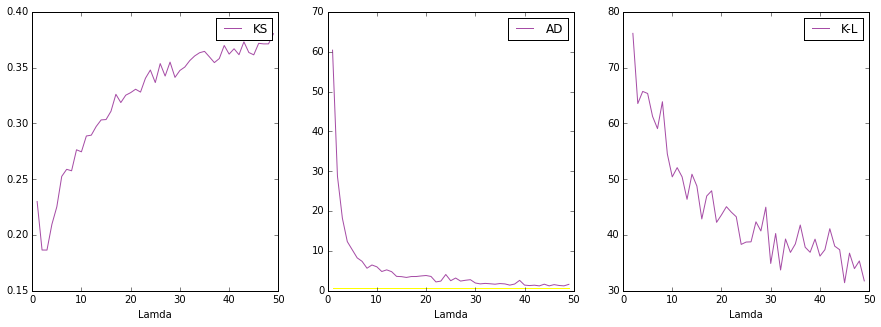

In [31]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_p, label='KS', color='Purple', alpha=0.7)
pl.xlabel('Lamda')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD', color='Purple', alpha=0.7)
pl.plot([narray[0], narray[-1]],[threshold, threshold], color='Yellow')
pl.plot()
pl.plot()
pl.xlabel('Lamda')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L', color='Purple', alpha=0.7)
pl.xlabel('Lamda')
pl.legend()

###Result
* As λ value(mean value or parameter) increase, statistic result value of goodness of fit testing decrease. (from Anderson, K-L test)
* It means, possibility to reject NULL hypothesis increase.
* On the other word, if n*p value increase, the binomial distribution would be likely to be related to normal distribution.
* But there is incresing pattern at KS test. I need to figure out about it.

####TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

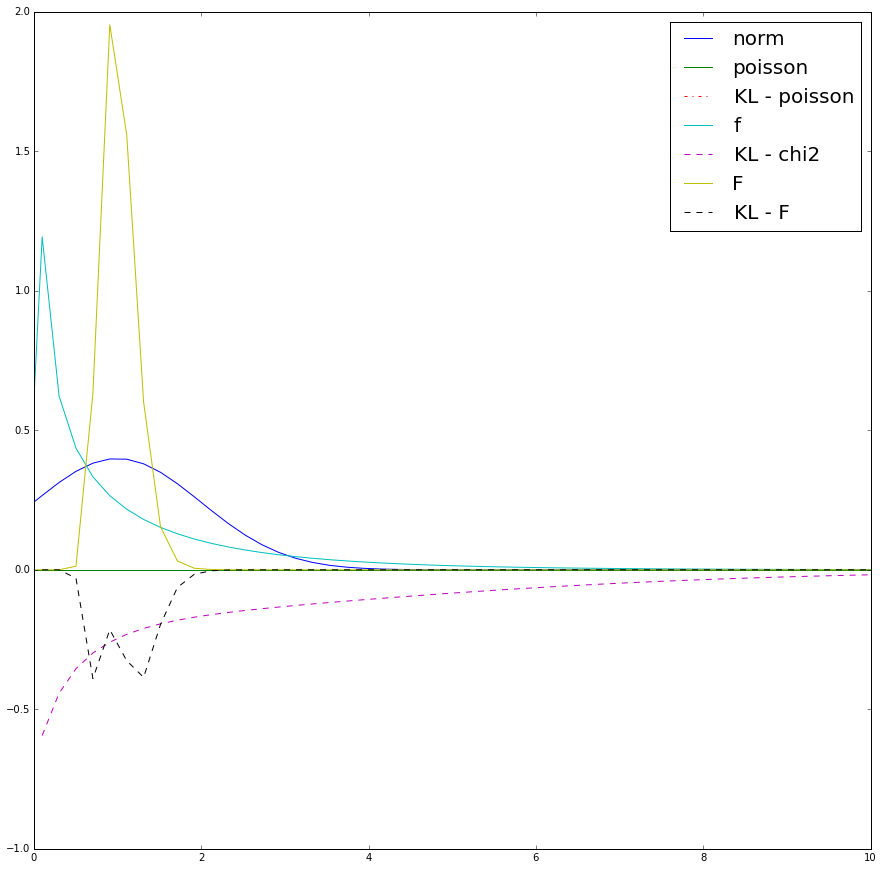

In [9]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)